<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd 
import numpy as np 
import os 
import plotly.graph_objects as go
pd.set_option('display.max_rows', 500) 

In [2]:
data = pd.read_csv('capiq_data/capiq data.csv') 
ids = pd.read_csv('capiq_data/capiq ids.csv') 


In [3]:
data = data.merge(ids, how = 'outer', 
           left_on = ['CQID'], 
           right_on = ['IQID'])
data.to_csv('capiq_data/capiq_data_names.csv') 
data.head() 

,Date,Fiscal Quarter,IQ_NI_CF,IQ_TOTAL_REV,IQ_AR,IQ_GP,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_AP,IQ_LT_DEBT,...,IQ_CASH_EQUIV,IQ_CASH_OPER,IQ_TOTAL_DIV_PAID_CF,IQ_CASH_FINAN,IQ_CAPITAL_LEASES,IQ_INVEST_SECURITY_CF,IQ_NI,CQID,IQID,IQ Name
0,2010-12-31,FQ42010,0.0,0.0,889.6,0.0,1673.0,14176.3,119.0,4953.5,...,338.0,0.0,0.0,0.0,0.0,0.0,0.0,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."
1,2011-03-31,FQ12011,92.8,1352.8,897.6,376.5,1644.7,14114.3,577.2,4478.2,...,384.1,260.2,-15.2,-140.1,0.0,0.0,92.8,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."
2,2011-06-30,FQ22011,123.5,1413.3,895.8,423.9,1705.6,14161.6,553.2,4322.3,...,427.3,263.3,-16.9,-157.3,0.0,0.0,123.5,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."
3,2011-09-30,FQ32011,0.0,1398.2,860.1,432.9,1604.2,13885.5,515.5,4332.9,...,386.8,0.0,0.0,0.0,0.0,0.0,136.3,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."
4,2011-12-31,FQ42011,117.0,1461.3,915.4,473.2,1674.0,13873.2,100.6,4554.6,...,415.5,372.4,-12.4,-271.3,0.0,0.0,117.0,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."


In [4]:
data = data[data.notnull()]
data.isna().sum()
## We can see that there are an equal amount of null values. So we can

Date                     8
Fiscal Quarter           8
IQ_NI_CF                 8
IQ_TOTAL_REV             8
IQ_AR                    8
IQ_GP                    8
IQ_TOTAL_CA              8
IQ_TOTAL_ASSETS          8
IQ_AP                    8
IQ_LT_DEBT               8
IQ_ST_DEBT               8
IQ_ST_DEBT_REPAID        8
IQ_LT_DEBT_REPAID        8
IQ_TOTAL_CL              8
IQ_TOTAL_LIAB            8
IQ_TOTAL_DEBT            8
IQ_NET_CHANGE            8
IQ_PERIODDATE_BS         8
IQ_FULL_TIME             8
IQ_TOTAL_EQUITY          8
IQ_CASH_EQUIV            8
IQ_CASH_OPER             8
IQ_TOTAL_DIV_PAID_CF     8
IQ_CASH_FINAN            8
IQ_CAPITAL_LEASES        8
IQ_INVEST_SECURITY_CF    8
IQ_NI                    8
CQID                     8
IQID                     0
IQ Name                  0
dtype: int64

In [5]:
data.dropna(inplace = True) 

In [6]:
## Reduce to only the variables we really want. 
small_df = data[['IQ Name', 'IQID', 'Fiscal Quarter',
                 'IQ_TOTAL_REV', 'IQ_NI_CF',
                 'IQ_AR', 
                 'IQ_GP ', 
                 'IQ_TOTAL_ASSETS', 
                 'IQ_AP', 
                 'IQ_TOTAL_LIAB', 
                 'IQ_TOTAL_DEBT', 
                 'IQ_CASH_FINAN', 
                 'IQ_TOTAL_EQUITY', 
                 'IQ_CASH_EQUIV' 
                 ]]
small_df['year'] = pd.to_numeric(small_df['Fiscal Quarter'].str[-4:])
small_df['quarter'] = pd.to_numeric(small_df['Fiscal Quarter'].str[-5] )
small_df.drop(columns = ['Fiscal Quarter'], inplace = True)
small_df.drop_duplicates(subset = ['year', 'quarter', 'IQID'], keep = 'first') 
small_df.head()

<ipython-input-6-6ad393c4a59b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['year'] = pd.to_numeric(small_df['Fiscal Quarter'].str[-4:])
<ipython-input-6-6ad393c4a59b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['quarter'] = pd.to_numeric(small_df['Fiscal Quarter'].str[-5] )
/Users/vijayyedidi/opt/anaconda3/envs/finance_rpi/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

,IQ Name,IQID,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_TOTAL_ASSETS,IQ_AP,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV,year,quarter
0,"Fidelity National Information Services, Inc.",IQ10081196,0.0,0.0,889.6,0.0,14176.3,119.0,7614.7,5210.4,0.0,6561.6,338.0,2010,4
1,"Fidelity National Information Services, Inc.",IQ10081196,1352.8,92.8,897.6,376.5,14114.3,577.2,7383.8,5069.6,-140.1,6730.5,384.1,2011,1
2,"Fidelity National Information Services, Inc.",IQ10081196,1413.3,123.5,895.8,423.9,14161.6,553.2,7267.2,4939.3,-157.3,6894.4,427.3,2011,2
3,"Fidelity National Information Services, Inc.",IQ10081196,1398.2,0.0,860.1,432.9,13885.5,515.5,7134.6,4917.5,0.0,6750.9,386.8,2011,3
4,"Fidelity National Information Services, Inc.",IQ10081196,1461.3,117.0,915.4,473.2,13873.2,100.6,7222.0,4813.8,-271.3,6651.2,415.5,2011,4


In [7]:
## See any zero variables 
Zeros = lambda df, col: df[df[col] == 0][['IQ Name', 'year', 'quarter', col]]
check_zeros = {}
for col in small_df.columns[2:-2]: 
    '''Looking at zero values. If there are more than 5 zeros in a column we're going
    to have to take a closer look''' 

    
    df = Zeros(small_df, col).groupby(['IQ Name']).count() 
    df = df[df[col] > 50]
    check_zeros[col] = df
    print('For {} we have {} '.format(col, df.shape[0]))

print(small_df.shape) 

For IQ_TOTAL_REV we have 0 
For IQ_NI_CF we have 0 
For IQ_AR we have 0 
For IQ_GP  we have 0 
For IQ_TOTAL_ASSETS we have 0 
For IQ_AP we have 0 
For IQ_TOTAL_LIAB we have 0 
For IQ_TOTAL_DEBT we have 0 
For IQ_CASH_FINAN we have 0 
For IQ_TOTAL_EQUITY we have 0 
For IQ_CASH_EQUIV we have 0 
(16752, 15)


Text(0.5, 1.0, 'AutoCorrelation Matrix Between Variables Total')

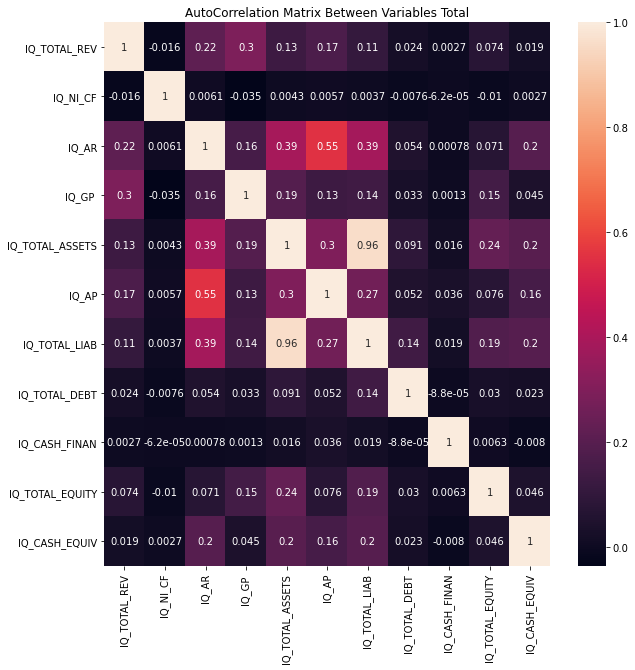

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 10)) 
inds = small_df[small_df.columns[2:-2]].pct_change().replace([np.inf, -np.inf], np.nan)

fig = sns.heatmap(inds.corr(), 
                 annot = True, ax = ax) 
fig.set_title('AutoCorrelation Matrix Between Variables Total')

In [10]:
inds[inds == np.inf].count()

IQ_TOTAL_REV       0
IQ_NI_CF           0
IQ_AR              0
IQ_GP              0
IQ_TOTAL_ASSETS    0
IQ_AP              0
IQ_TOTAL_LIAB      0
IQ_TOTAL_DEBT      0
IQ_CASH_FINAN      0
IQ_TOTAL_EQUITY    0
IQ_CASH_EQUIV      0
dtype: int64

In [11]:
small_df.head(6)

,IQ Name,IQID,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_TOTAL_ASSETS,IQ_AP,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV,year,quarter
0,"Fidelity National Information Services, Inc.",IQ10081196,0.0,0.0,889.6,0.0,14176.3,119.0,7614.7,5210.4,0.0,6561.6,338.0,2010,4
1,"Fidelity National Information Services, Inc.",IQ10081196,1352.8,92.8,897.6,376.5,14114.3,577.2,7383.8,5069.6,-140.1,6730.5,384.1,2011,1
2,"Fidelity National Information Services, Inc.",IQ10081196,1413.3,123.5,895.8,423.9,14161.6,553.2,7267.2,4939.3,-157.3,6894.4,427.3,2011,2
3,"Fidelity National Information Services, Inc.",IQ10081196,1398.2,0.0,860.1,432.9,13885.5,515.5,7134.6,4917.5,0.0,6750.9,386.8,2011,3
4,"Fidelity National Information Services, Inc.",IQ10081196,1461.3,117.0,915.4,473.2,13873.2,100.6,7222.0,4813.8,-271.3,6651.2,415.5,2011,4
5,"Fidelity National Information Services, Inc.",IQ10081196,1413.4,87.1,948.7,423.9,13904.4,522.4,7137.3,4850.5,-75.8,6767.1,481.7,2012,1


In [12]:
inds[inds.columns[8:]].describe().iloc[1:]

,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV
mean,1.386582,0.064089,0.363928
std,236.307303,4.142464,9.320592
min,-20616.500000,-234.022831,-1.000000
25%,-1.215930,-0.015541,-0.150302
50%,-0.472852,0.010843,0.005509
75%,0.240228,0.042709,0.199161
max,12601.090909,360.672437,1040.570681


In [13]:
inds[inds.columns[:8]].describe().iloc[1:]

,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_TOTAL_ASSETS,IQ_AP,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT
mean,0.065841,0.251289,0.115555,0.057229,0.074023,0.489841,0.106374,0.538703
std,1.952175,38.296969,3.058507,1.471670,1.944212,12.676893,2.745089,18.462010
min,-43.472973,-821.000000,-1.000000,-42.375000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.034482,-0.366349,-0.052732,-0.052958,-0.008078,-0.060644,-0.015910,-0.022571
50%,0.012991,-0.002424,0.007237,0.012804,0.009532,0.010705,0.006766,0.000000
75%,0.070982,0.222530,0.081184,0.089810,0.034883,0.100364,0.042064,0.037278
max,171.387097,4274.333333,261.760131,83.672872,181.992177,764.127602,269.891656,1691.593985


In [16]:
small_df.to_csv('small_df.csv') 

In [15]:
inds.head() 

,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_TOTAL_ASSETS,IQ_AP,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.008993,NaN,-0.004373,3.850420,-0.030323,-0.027023,NaN,0.025741,0.136391
2,0.044722,0.330819,-0.002005,0.125896,0.003351,-0.041580,-0.015791,-0.025702,0.122769,0.024352,0.112471
3,-0.010684,-1.000000,-0.039853,0.021231,-0.019496,-0.068149,-0.018246,-0.004414,-1.000000,-0.020814,-0.094781
4,0.045129,NaN,0.064295,0.093093,-0.000886,-0.804850,0.012250,-0.021088,NaN,-0.014768,0.074199
